In [7]:
pip install matplotlib -i https://pypi.tuna.tsinghua.edu.cn/simple

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


<!doctype html><html><head><meta charset="utf-8"><meta name="viewport" content="width=device-width,initial-scale=1,minimum-scale=1,maximum-scale=1,user-scalable=no,viewport-fit=cover"><meta name="format-detection" content="telephone=no,address=no,email=no"><meta name="mobileOptimized" content="width"><meta name="HandheldFriendly" content="true"><meta name="applicable-device" content="pc,mobile"><meta http-equiv="X-UA-Compatible" content="IE=Edge,chrome=1"><meta http-equiv="Cache-Control" content="no-transform"><meta http-equiv="Cache-Control" content="no-siteapp"><meta name="apple-mobile-web-app-capable" content="yes"><meta name="apple-mobile-web-app-status-bar-style" content="black"><meta name="shenma-site-verification" content="3abbfaac4345ca4daaa5ad2282115298_1476771175"><meta name="360-site-verification" content="86dcc68a445e2ed8034e85f0ba88a83a"><meta name="sogou-site-verification" content="tJLhUJDcki"><meta name="google-site-verification" content="-wdhMjIAPXapbEjwFVejIM-GCtl1fc9n
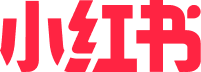

In [9]:
import requests

url = "https://www.xiaohongshu.com/explore/64d61930000000000800f34f"
headers = {
'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/96.0.4664.93 Safari/537.36 Edg/96.0.1054.53'}

# 发送GET请求并获取响应
response = requests.get(url, headers=headers)

# 检查响应状态码
if response.status_code == 200:
    # 获取网页内容
    content = response.text
    print(content)
else:
    print("Failed to retrieve the webpage. Status code:", response.status_code)

<!doctype html><html><head><meta charset="utf-8"><meta name="viewport" content="width=device-width,initial-scale=1,minimum-scale=1,maximum-scale=1,user-scalable=no,viewport-fit=cover"><meta name="format-detection" content="telephone=no,address=no,email=no"><meta name="mobileOptimized" content="width"><meta name="HandheldFriendly" content="true"><meta name="applicable-device" content="pc,mobile"><meta http-equiv="X-UA-Compatible" content="IE=Edge,chrome=1"><meta http-equiv="Cache-Control" content="no-transform"><meta http-equiv="Cache-Control" content="no-siteapp"><meta name="apple-mobile-web-app-capable" content="yes"><meta name="apple-mobile-web-app-status-bar-style" content="black"><meta name="shenma-site-verification" content="3abbfaac4345ca4daaa5ad2282115298_1476771175"><meta name="360-site-verification" content="86dcc68a445e2ed8034e85f0ba88a83a"><meta name="sogou-site-verification" content="tJLhUJDcki"><meta name="google-site-verification" content="-wdhMjIAPXapbEjwFVejIM-GCtl1fc9n
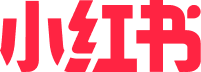

In [1]:

import requests

url = "https://www.xiaohongshu.com/user/profile/581535d16a6a694890abae38"
headers = {
'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/96.0.4664.93 Safari/537.36 Edg/96.0.1054.53'}

# 发送GET请求并获取响应
response = requests.get(url, headers=headers)

# 检查响应状态码
if response.status_code == 200:
    # 获取网页内容
    content = response.text
    print(content)
    #content保存到txt 
    with open('content.txt', 'w', encoding='utf-8') as f:
        f.write(content)
else:
    print("Failed to retrieve the webpage. Status code:", response.status_code)

In [2]:
# 导入库
import requests
from bs4 import BeautifulSoup
import pandas as pd
import re
from lxml import etree # 导入etree模块

# 定义请求头
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/89.0.4389.82 Safari/537.36'
}

# 定义初始网址
start_url = 'https://www.xiaohongshu.com/user/profile/581535d16a6a694890abae38'

# 定义空列表，用于存储数据
note_links = [] # 笔记链接

# 发送请求，获取响应
response = requests.get(start_url, headers=headers)
# 解析响应，得到HTML文本
html = response.text
#print(html)
# 使用BeautifulSoup解析HTML文本
pattern = r'href="/explore/(\w+)"'  # 匹配 href="/explore/" 后面的一串字符

matches = re.findall(pattern, html)  # 使用 findall 方法找到所有匹配项
#新建空数组
wz1 = []
if matches:
    # 打印所有匹配项
    for match in matches:
        url = "https://www.xiaohongshu.com/explore/" + match
        #print(url)
        wz1.append(url)
        #print(match)
else:
    print("没有找到匹配项")
print(wz1)    

#遍历数组wz1
for wz2 in wz1:

    # 发送请求，获取响应
    response = requests.get(wz2, headers=headers)
    # 解析响应，得到_Element对象
    html = etree.HTML(response.text) # 使用etree.HTML()函数解析HTML文本
    # 提取description的content，使用html.xpath()方法
    description = html.xpath('//meta [@name="description"]/@content') # 得到一个列表，包含description的content
    # 列表中只有一个元素，取出来赋值给一个变量
    description = description[0]

    # 打印description的content
    print(description)
    # description保存到1.csv
    with open('1.csv', 'a', encoding='utf-8') as f:
        f.write(description + '\n')
        

['https://www.xiaohongshu.com/explore/657ac9060000000038025f41', 'https://www.xiaohongshu.com/explore/655366e20000000017036632', 'https://www.xiaohongshu.com/explore/659544be000000001c0132a8', 'https://www.xiaohongshu.com/explore/659400a7000000001e009081', 'https://www.xiaohongshu.com/explore/658e3c1c0000000015001ae3', 'https://www.xiaohongshu.com/explore/658d64b600000000110334a2', 'https://www.xiaohongshu.com/explore/658c1cbf000000001e0093ee', 'https://www.xiaohongshu.com/explore/658bc69a000000001c010eb2', 'https://www.xiaohongshu.com/explore/658aa5d7000000001a000625', 'https://www.xiaohongshu.com/explore/6587b1480000000038017ca5', 'https://www.xiaohongshu.com/explore/658657d1000000003802e4ef', 'https://www.xiaohongshu.com/explore/65842fc3000000003c012e25', 'https://www.xiaohongshu.com/explore/6583b723000000003802733c', 'https://www.xiaohongshu.com/explore/6582dcc50000000038020a50', 'https://www.xiaohongshu.com/explore/65816b07000000003c0126c2', 'https://www.xiaohongshu.com/explore/65

UnicodeEncodeError: 'gbk' codec can't encode character '\u2744' in position 0: illegal multibyte sequence

In [ ]:
pip install ipykernel -U --user --force-reinstall

In [14]:
# 导入库
import requests
from lxml import etree # 导入etree模块

# 定义请求头
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/89.0.4389.82 Safari/537.36'
}

# 定义要采集的网址，这里以百度为例
url = 'https://www.xiaohongshu.com/explore/6571873200000000340358ce'

# 发送请求，获取响应
response = requests.get(url, headers=headers)
# 解析响应，得到_Element对象
html = etree.HTML(response.text) # 使用etree.HTML()函数解析HTML文本
# 提取description的content，使用html.xpath()方法
description = html.xpath('//meta [@name="description"]/@content') # 得到一个列表，包含description的content
# 列表中只有一个元素，取出来赋值给一个变量
description = description[0]

# 打印description的content
print(description)


自1958年法国第五共和国(五共)制宪以来，法国建立了半总统制，实现制度层面在稳定和效率间的相对平衡。 	 - 合法性来源： 五共总统由全民选举直接选出，总统拥有人民主权授予的合法性。(1962宪法第6条) 	 - 内阁任免： 总统实际控制行政权，并任命内阁和总理，但总统颁布命令需得到总理和内阁的签字。同时，总理对议会负责。 	 - 不信任投票程序修正： 总理需在部长会议审核后提交法案给议会，如议会否决该案即会发起不信任投票。若投票通过，宪法习惯要求总统强迫总理辞职，以防止议会解散或产生政治僵局。 	 - 事实多数(fait majoritaire)： 五共会在总统选举后立刻进行议会选举，以尽量确保行政和立法机构由同一政党控制，避免党争导致的政治动荡。 	 - 紧急状态权： 五共的紧急状态由总统发布。2008年宪法修正案后，总统有权利在海外开展军事行动后3天内通知议会。议会可以因此进行辩论，但不会立刻进行投票。如果干预持续超过四个月，政府必须将延长行动的提案提交给议会审核授权。(宪法第35条c) 	 白话翻译： 通过建立宪法传统和赋予总统强大的行政权力，五共实现了制度层面的权力制衡，避免了四共出现的政治僵局和宪法危机。 	 参考资料： G. Allen-Mestrallet "INTRODUCTION TO COMPARATIVE POLITICAL INSTITUTIONS AND CONSTITUTIONAL LAW" Autumn 2017. 	 #巴黎政治学院  #国际关系  #政治  #法国  #法国政治  #第五共和国  #五共  #宪法  #西方政治制度  #比较政治  #权力平衡  #三权分立  #社科达人激励计划  #社科  #人文  #人文科普  #名词解释  #人文社科类  #AP比较政治


In [4]:
# 导入所需的库
import pygame
import random
import sys
import time
from collections import deque
pygame.init()
# 设置窗口大小和网格大小
SCREEN_WIDTH = 600
SCREEN_HEIGHT = 480
SIZE = 20

# 定义颜色常量
BLACK = (0, 0, 0) # 网格线颜色
WHITE = (255, 255, 255) # 文字颜色
RED = (255, 0, 0) # GAME OVER 的字体颜色
GREEN = (0, 255, 0) # 蛇的颜色
BLUE = (0, 0, 255) # 食物颜色
BG_COLOR = (40, 40, 60) # 背景色

# 定义方向常量
UP = (0, -1)
DOWN = (0, 1)
LEFT = (-1, 0)
RIGHT = (1, 0)

# 定义字体
FONT1 = pygame.font.SysFont('SimHei', 24) # 得分的字体
FONT2 = pygame.font.Font(None, 72) # GAME OVER 的字体

# 定义游戏区域的坐标范围
SCOPE_X = (0, SCREEN_WIDTH // SIZE - 1)
SCOPE_Y = (2, SCREEN_HEIGHT // SIZE - 1)

# 定义打印文本的函数
def print_text(screen, font, x, y, text, color=WHITE):
    img_text = font.render(text, True, color)
    screen.blit(img_text, (x, y))

# 定义初始化蛇的函数
def init_snake():
    snake = deque()
    snake.append((2, SCOPE_Y[0]))
    snake.append((1, SCOPE_Y[0]))
    snake.append((0, SCOPE_Y[0]))
    return snake

# 定义创建食物的函数
def create_food(snake):
    food_x = random.randint(SCOPE_X[0], SCOPE_X[1])
    food_y = random.randint(SCOPE_Y[0], SCOPE_Y[1])
    while (food_x, food_y) in snake: # 防止食物出现在蛇身上
        food_x = random.randint(SCOPE_X[0], SCOPE_X[1])
        food_y = random.randint(SCOPE_Y[0], SCOPE_Y[1])
    return food_x, food_y

# 定义游戏结束的函数
def game_over(screen):
    fwidth, fheight = FONT2.size('GAME OVER')
    print_text(screen, FONT2, (SCREEN_WIDTH - fwidth) // 2, (SCREEN_HEIGHT - fheight) // 2, 'GAME OVER', RED)
    pygame.display.update()
    pygame.time.wait(2000)
    pygame.quit()
    sys.exit()

# 主函数
def main():
    pygame.init() # 初始化pygame
    screen = pygame.display.set_mode((SCREEN_WIDTH, SCREEN_HEIGHT)) # 创建窗口
    pygame.display.set_caption('贪吃蛇') # 设置窗口标题
    clock = pygame.time.Clock() # 创建时钟对象
    snake = init_snake() # 初始化蛇
    food_x, food_y = create_food(snake) # 创建食物
    direction = RIGHT # 初始方向向右
    change_to = direction # 改变方向
    score = 0 # 得分
    orispeed = 0.5 # 初始速度
    speed = orispeed # 当前速度
    last_move_time = None # 上次移动时间
    pause = False # 是否暂停
    game_over_flag = False # 是否游戏结束
    start = False # 是否开始游戏

    while True: # 游戏主循环
        for event in pygame.event.get(): # 处理事件
            if event.type == pygame.QUIT: # 点击关闭按钮
                pygame.quit()
                sys.exit()
            elif event.type == pygame.KEYDOWN: # 按键事件
                if event.key == pygame.K_RETURN: # 回车键
                    if game_over_flag: # 如果游戏结束，重新开始
                        start = True
                        game_over_flag = False
                        snake = init_snake()
                        food_x, food_y = create_food(snake)
                        direction = RIGHT
                        change_to = direction
                        score = 0
                        speed = orispeed
                        last_move_time = time.time()
                elif event.key == pygame.K_SPACE: # 空格键
                    if not game_over_flag: # 如果游戏没有结束，暂停或继续
                        pause = not pause
                elif event.key in (pygame.K_w, pygame.K_UP): # W或上方向键
                    if change_to[1] != 1: # 防止掉头
                        change_to = UP
                elif event.key in (pygame.K_s, pygame.K_DOWN): # S或下方向键
                    if change_to[1] != -1: # 防止掉头
                        change_to = DOWN
                elif event.key in (pygame.K_a, pygame.K_LEFT): # A或左方向键
                    if change_to[0] != 1: # 防止掉头
                        change_to = LEFT
                elif event.key in (pygame.K_d, pygame.K_RIGHT): # D或右方向键
                    if change_to[0] != -1: # 防止掉头
                        change_to = RIGHT

        # 填充背景色
        screen.fill(BG_COLOR)
        # 画网格线
        for x in range(SIZE, SCREEN_WIDTH, SIZE):
            pygame.draw.line(screen, BLACK, (x, SCOPE_Y[0] * SIZE), (x, SCREEN_HEIGHT))
        for y in range(SCOPE_Y[0] * SIZE, SCREEN_HEIGHT, SIZE):
            pygame.draw.line(screen, BLACK, (0, y), (SCREEN_WIDTH, y))
        # 显示标题和得分
        print_text(screen, FONT1, 30, 7, '贪吃蛇')
        print_text(screen, FONT1, 450, 7, f'得分: {score}')
        # 移动蛇
        if not pause: # 如果没有暂停
            curTime = time.time() # 获取当前时间
            if curTime - last_move_time > speed: # 如果达到移动间隔
                if start: # 如果游戏开始
                    direction = change_to # 改变方向
                    next_s = (snake[0][0] + direction[0], snake[0][1] + direction[1]) # 计算下一个位置
                    if next_s[0] == food_x and next_s[1] == food_y: # 如果吃到食物
                        snake.appendleft(next_s) # 蛇头增加
                        food_x, food_y = create_food(snake) # 重新生成食物
                        score += 10 # 加分
                        speed = orispeed - 0.03 * (score // 100) # 提速
                    else: # 如果没有吃到食物
                        if SCOPE_X[0] <= next_s[0] <= SCOPE_X[1] and SCOPE_Y[0] <= next_s[1] <= SCOPE_Y[1] and next_s not in snake: # 如果没有撞墙或撞到自己
                            snake.appendleft(next_s) # 蛇头增加
                            snake.pop() # 蛇尾减少
                        else: # 如果撞墙或撞到自己
                            game_over_flag = True # 游戏结束
                last_move_time = curTime # 更新上次移动时间
        # 画食物
        pygame.draw.rect(screen, BLUE, (food_x * SIZE, food_y * SIZE, SIZE, SIZE))
        # 画蛇
        for s in snake:
            pygame.draw.rect(screen, GREEN, (s[0] * SIZE, s[1] * SIZE, SIZE, SIZE))
        # 判断游戏是否结束
        if game_over_flag:
            if start:
                game_over(screen) # 显示游戏结束画面
            else:
                print_text(screen, FONT2, (SCREEN_WIDTH - fwidth) // 2, (SCREEN_HEIGHT - fheight) // 2, '按回车开始', RED) # 显示开始提示
        # 刷新屏幕
        pygame.display.flip()
        # 设置帧率
        clock.tick(60)

# 运行主函数
if __name__ == '__main__':
    main()


TypeError: unsupported operand type(s) for -: 'float' and 'NoneType'

: 

In [2]:
pip install pygame

   ---------------------------------------- 0.0/10.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/10.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/10.8 MB ? eta -:--:--
   ---------------------------------------- 0.1/10.8 MB 656.4 kB/s eta 0:00:17
   ---------------------------------------- 0.1/10.8 MB 656.4 kB/s eta 0:00:17
   ---------------------------------------- 0.1/10.8 MB 656.4 kB/s eta 0:00:17
   ---------------------------------------- 0.1/10.8 MB 326.8 kB/s eta 0:00:33
   ---------------------------------------- 0.1/10.8 MB 327.7 kB/s eta 0:00:33
   ---------------------------------------- 0.1/10.8 MB 327.2 kB/s eta 0:00:33
   ---------------------------------------- 0.1/10.8 MB 313.8 kB/s eta 0:00:34
   ---------------------------------------- 0.1/10.8 MB 313.8 kB/s eta 0:00:34
   ---------------------------------------- 0.1/10.8 MB 313.8 kB/s eta 0:00:34
   ---------------------------------------- 0.1/10.8 MB 313.8 kB/s eta 0:00:34
